Load data and import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from itertools import groupby

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
url = '/content/trend_consumer new.csv'
data = pd.read_csv(url)
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-04-29,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,Experian Information Solutions Inc.,MO,631XX,Web,2024-04-29,Closed with explanation,Yes,NaN,8878641
1,2024-05-21,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NC,28001,Web,2024-05-21,Closed with non-monetary relief,Yes,NaN,9064241
2,2024-05-21,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",WI,53218,Web,2024-05-21,Closed with non-monetary relief,Yes,NaN,9064573
3,2024-05-21,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,62226,Web,2024-05-21,Closed with non-monetary relief,Yes,NaN,9064507
4,2024-05-21,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,35126,Web,2024-05-21,Closed with non-monetary relief,Yes,NaN,9064567


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 590 non-null    object 
 1   Product                       590 non-null    object 
 2   Sub-product                   590 non-null    object 
 3   Issue                         590 non-null    object 
 4   Sub-issue                     590 non-null    object 
 5   Company                       590 non-null    object 
 6   State                         590 non-null    object 
 7   ZIP code                      590 non-null    object 
 8   Submitted via                 590 non-null    object 
 9   Date sent to company          590 non-null    object 
 10  Company response to consumer  590 non-null    object 
 11  Timely response?              590 non-null    object 
 12  Consumer disputed?            0 non-null      float64
 13  Compl

In [5]:
data.groupby(['Issue', 'Sub-issue'])['Complaint ID'].count().sort_values(ascending = False).reset_index()

,Issue,Sub-issue,Complaint ID
0,Incorrect information on your report,Information belongs to someone else,174
1,Improper use of your report,Reporting company used your report improperly,119
2,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,66
3,Improper use of your report,Credit inquiries on your report that you don't...,39
4,Incorrect information on your report,Account status incorrect,38
5,Incorrect information on your report,Account information incorrect,19
6,Problem with a company's investigation into an...,Investigation took more than 30 days,18
7,Problem with a company's investigation into an...,Was not notified of investigation status or re...,16
8,Incorrect information on your report,Personal information incorrect,14
9,Attempts to collect debt not owed,Debt is not yours,8


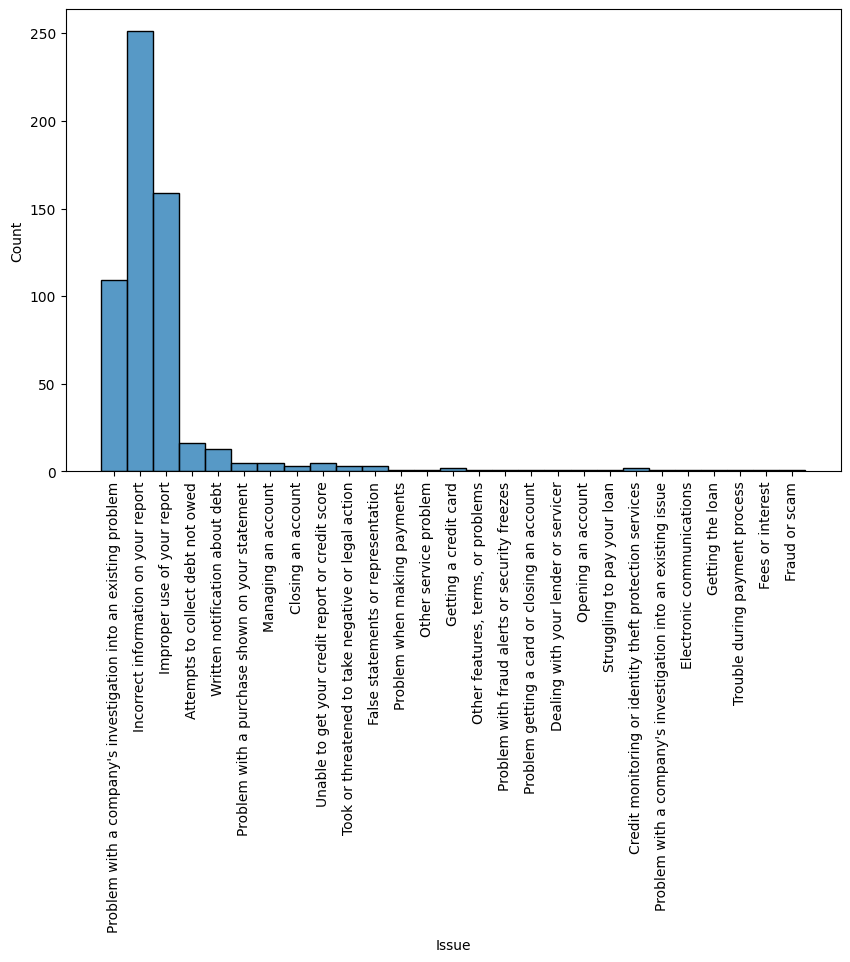

In [6]:
plt.figure(figsize = (10, 6))
sns.histplot(data = data, x = 'Issue')
plt.xticks(rotation = 90)
plt.show()

Exploratory Analysis

In [7]:
data.describe()

,Consumer disputed?,Complaint ID
count,0.0,5.900000e+02
mean,NaN,9.330262e+06
std,NaN,6.612792e+04
min,NaN,8.878641e+06
25%,NaN,9.320902e+06
50%,NaN,9.350580e+06
75%,NaN,9.376760e+06
max,NaN,9.383072e+06


In [8]:
data.isnull().sum()

,0
Date received,0
Product,0
Sub-product,0
Issue,0
Sub-issue,0
Company,0
State,0
ZIP code,0
Submitted via,0
Date sent to company,0


In [9]:
data.dtypes

,0
Date received,object
Product,object
Sub-product,object
Issue,object
Sub-issue,object
Company,object
State,object
ZIP code,object
Submitted via,object
Date sent to company,object


Univariate Analysis

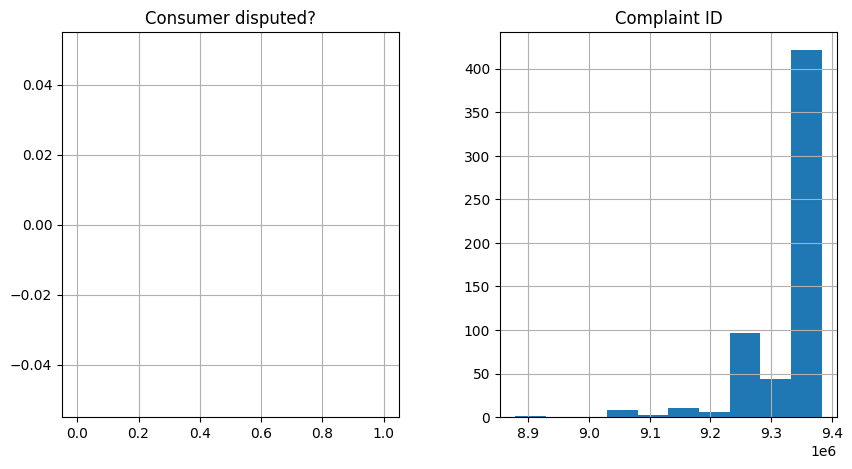

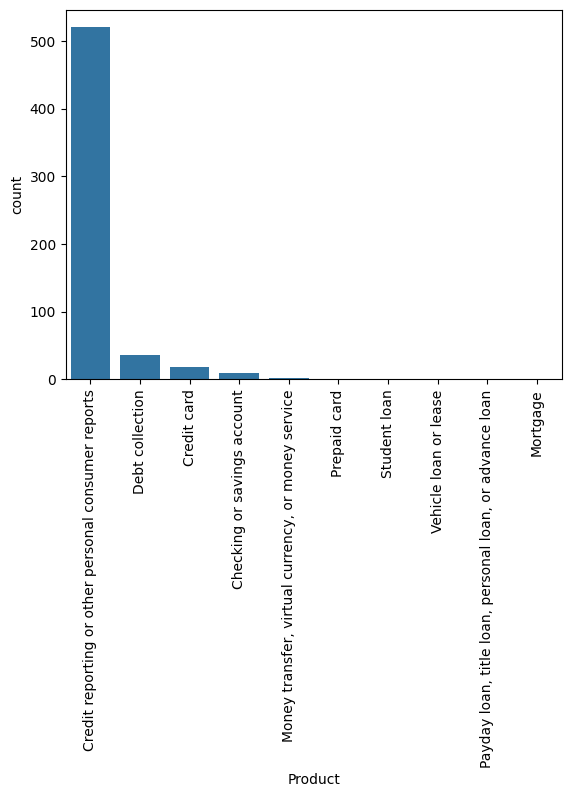

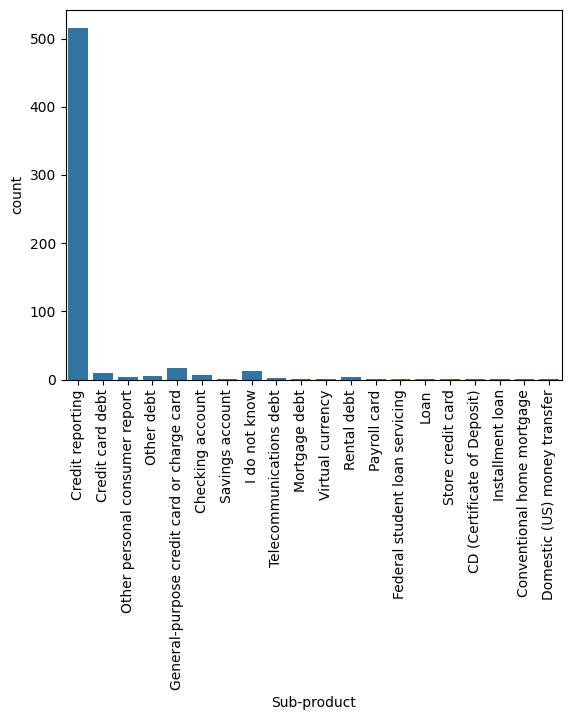

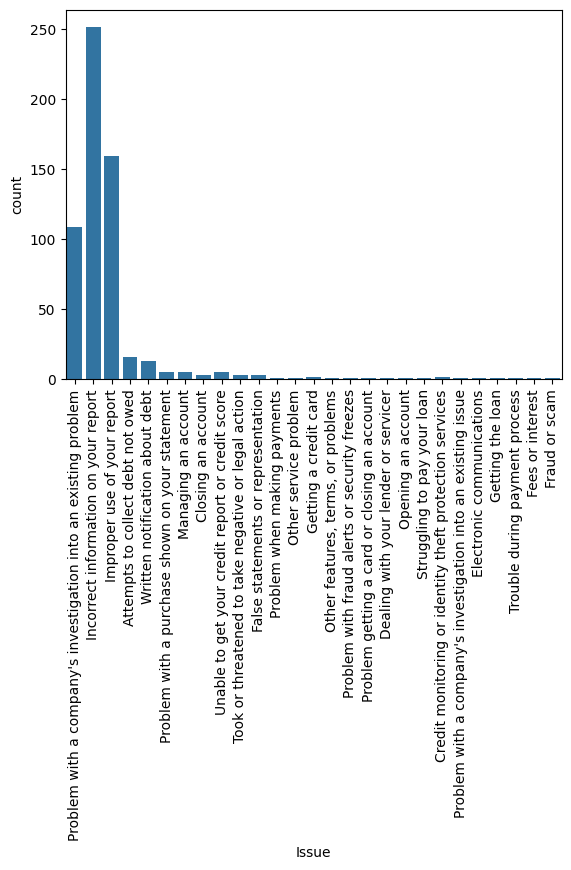

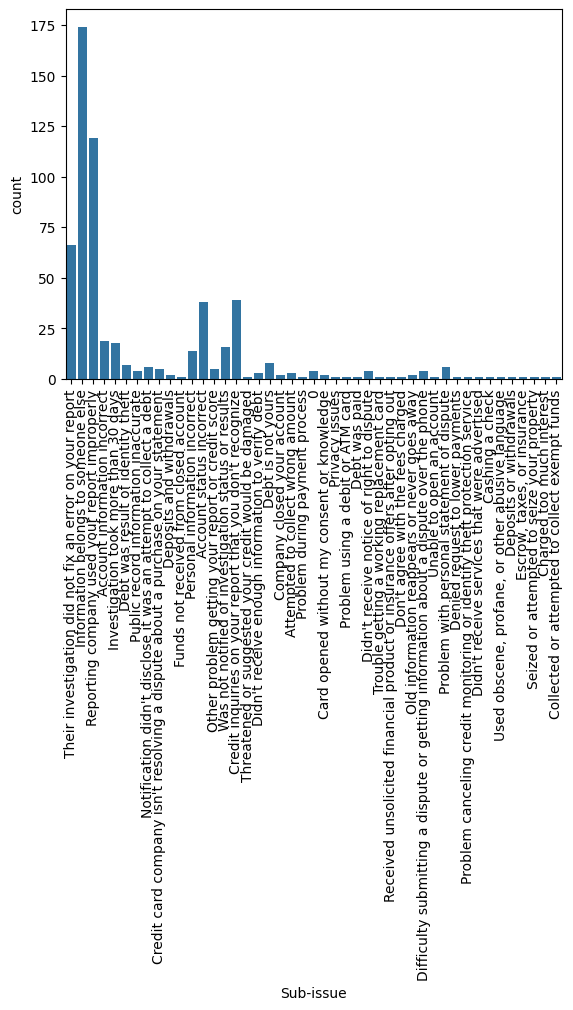

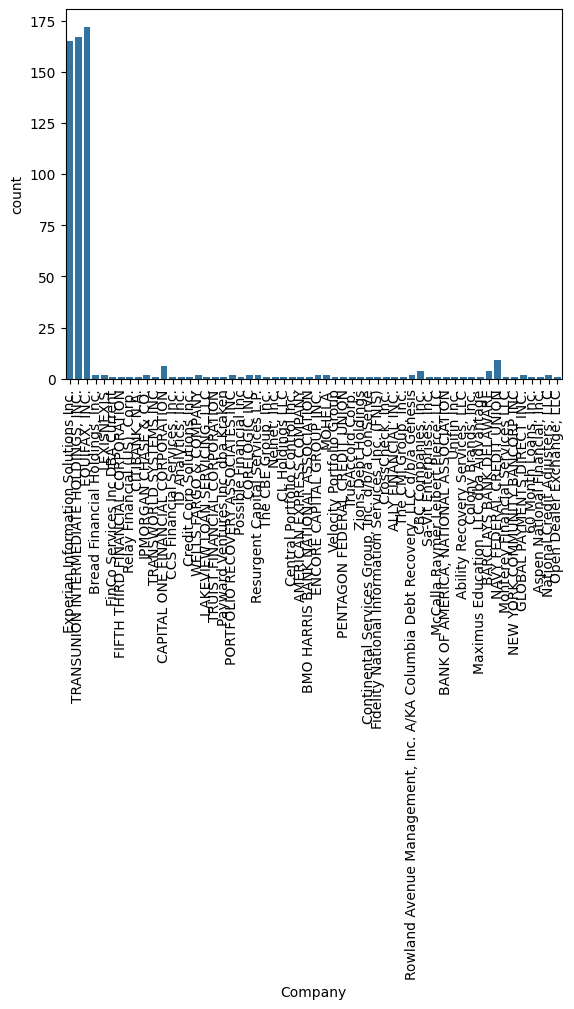

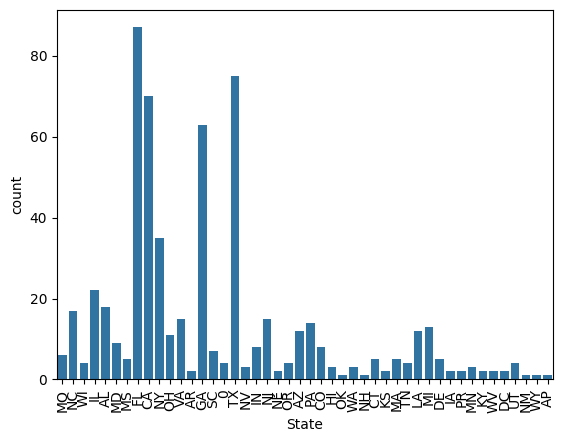

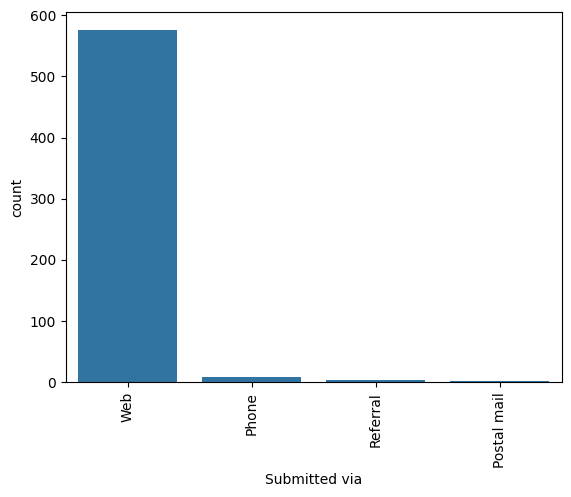

In [10]:
data.hist(bins = 10, figsize = (10, 5))
plt.show()

for column in ['Product', 'Sub-product', 'Issue', 'Sub-issue', 'Company', 'State', 'Submitted via']:
  sns.countplot(data = data, x = column)
  plt.xticks(rotation = 90)
  plt.show()

Bivariate Analysis

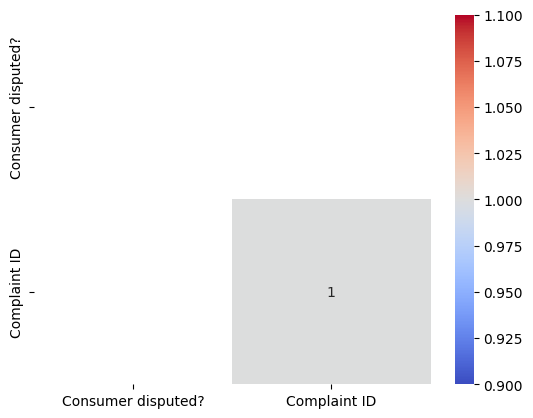

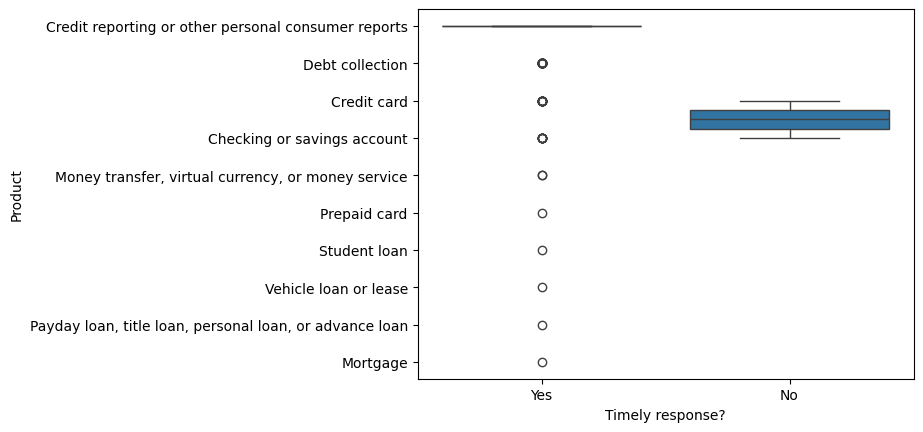

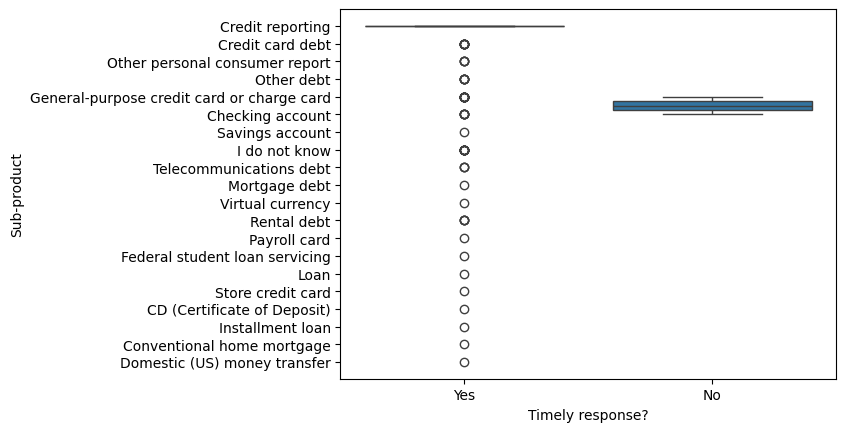

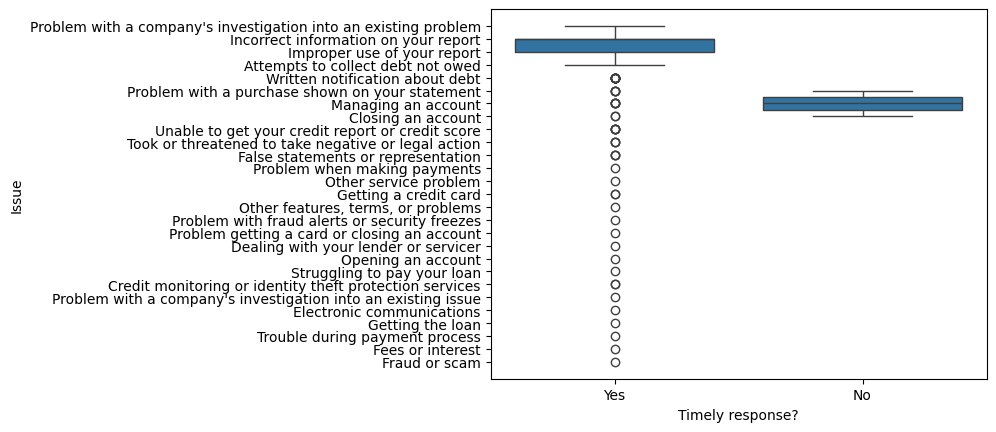

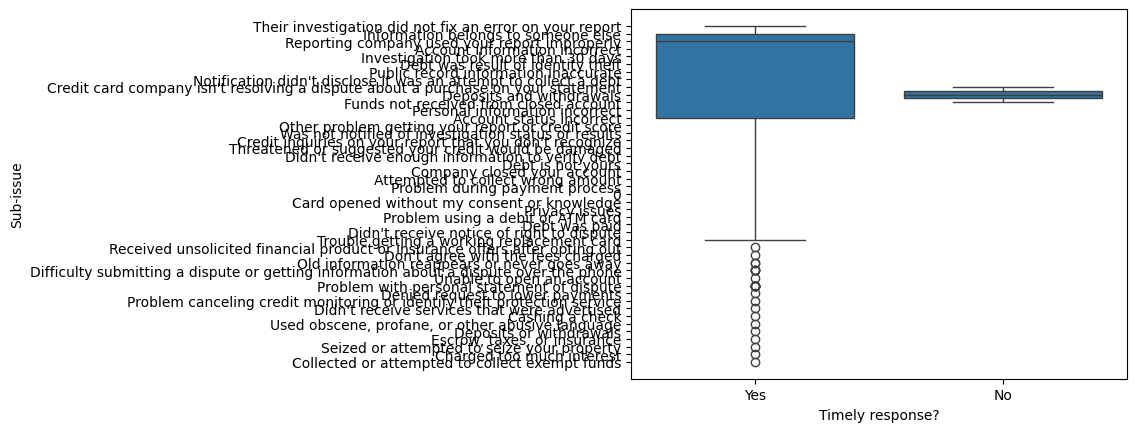

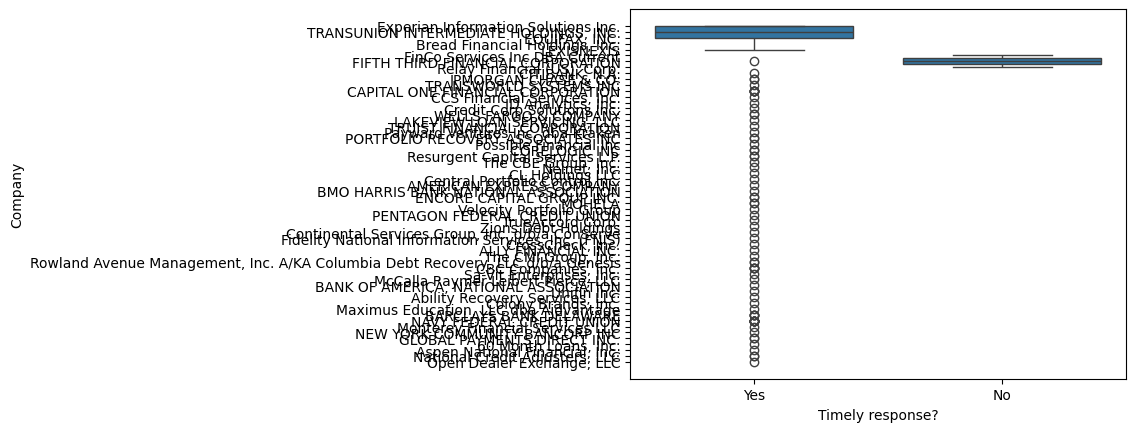

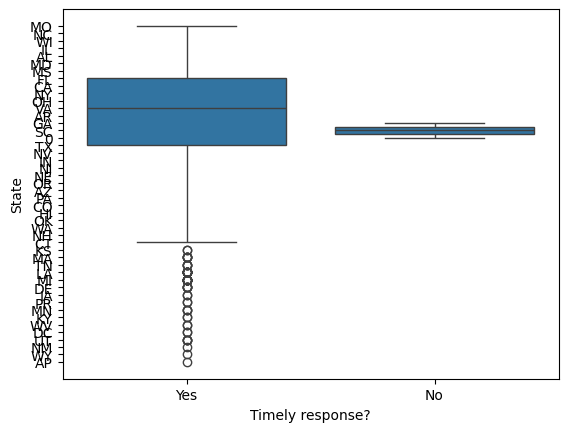

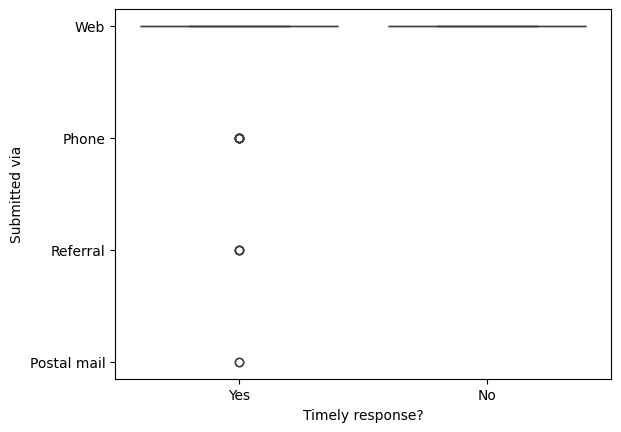

In [11]:
corr = data.select_dtypes(include = ['number']).corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

for column in ['Product', 'Sub-product', 'Issue', 'Sub-issue', 'Company', 'State', 'Submitted via']:
  sns.boxplot(x = 'Timely response?', y = column, data = data)
  plt.show()

In [12]:
# Frequency distribution of categorical columns
for column in data.select_dtypes(include=['object']).columns:
    print(data[column].value_counts())
    print('\n')

Date received
2024-06-28    176
2024-06-26     90
2024-06-12     52
2024-06-24     46
2024-06-25     43
2024-06-29     39
2024-06-27     34
2024-06-13     24
2024-06-22     14
2024-06-21     12
2024-06-14     10
2024-06-17      9
2024-05-30      7
2024-05-21      7
2024-06-20      6
2024-06-07      2
2024-06-19      2
2024-06-06      2
2024-06-05      2
2024-06-18      2
2024-06-11      1
2024-06-04      1
2024-06-23      1
2024-05-31      1
2024-06-08      1
2024-06-15      1
2024-05-28      1
2024-05-24      1
2024-05-22      1
2024-06-01      1
2024-04-29      1
Name: count, dtype: int64


Product
Credit reporting or other personal consumer reports        520
Debt collection                                             36
Credit card                                                 18
Checking or savings account                                  9
Money transfer, virtual currency, or money service           2
Prepaid card                                                 1
Student loan  

In [13]:
# Define a threshold for what you consider a rare category (e.g., less than 1% of the data)
threshold = 0.01

# Find rare categories
for column in data.select_dtypes(include=['object']).columns:
    freq = data[column].value_counts(normalize=True)
    rare_categories = freq[freq < threshold].index
    print(f'Rare categories in {column}: {list(rare_categories)}')
    print('\n')

Rare categories in Date received: ['2024-06-07', '2024-06-19', '2024-06-06', '2024-06-05', '2024-06-18', '2024-06-11', '2024-06-04', '2024-06-23', '2024-05-31', '2024-06-08', '2024-06-15', '2024-05-28', '2024-05-24', '2024-05-22', '2024-06-01', '2024-04-29']


Rare categories in Product: ['Money transfer, virtual currency, or money service', 'Prepaid card', 'Student loan', 'Vehicle loan or lease', 'Payday loan, title loan, personal loan, or advance loan', 'Mortgage']


Rare categories in Sub-product: ['Other personal consumer report', 'Rental debt', 'Telecommunications debt', 'Loan', 'Conventional home mortgage', 'Installment loan', 'CD (Certificate of Deposit)', 'Store credit card', 'Virtual currency', 'Federal student loan servicing', 'Payroll card', 'Mortgage debt', 'Savings account', 'Domestic (US) money transfer']


Rare categories in Issue: ['Problem with a purchase shown on your statement', 'Managing an account', 'Unable to get your credit report or credit score', 'Closing an ac

In [14]:
# Group rare categories into 'Other'
for column in data.select_dtypes(include=['object']).columns:
    data[column] = np.where(data[column].isin(rare_categories), 'Other', data[column])

In [15]:
# Remove rows with rare categories
for column in data.select_dtypes(include=['object']).columns:
    data = data[~data[column].isin(rare_categories)]


In [16]:
# Create a new column that flags rare categories
for column in data.select_dtypes(include=['object']).columns:
    data[f'{column}_is_rare'] = data[column].isin(rare_categories).astype(int)


Data Preprocessing

In [17]:
# Ensure stopwords are downloaded
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
# Combine text columns for analysis
data['text'] = data['Product'] + " " + data['Issue'] + " " + data['Sub-issue'] + " " + data['Company']

# Basic text cleaning
data['text'] = data['text'].apply(lambda x: re.sub(r'\W', ' ', x))
data['text'] = data['text'].apply(lambda x: re.sub(r'\s+', ' ', x))
data['text'] = data['text'].apply(lambda x: x.lower())

In [19]:

# Remove stop words
stop_words = set(stopwords.words('english'))
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['Company response to consumer'], test_size=0.2, random_state=42)

Feature Engineering

In [20]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [21]:
models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Voting": VotingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('svc', SVC(probability=True)),
        ('lr', LogisticRegression())
    ], voting='soft')
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred) * 100
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}%")

# Sort models by accuracy
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
print("\nModel Ranking:")
for name, accuracy in sorted_results:
    print(f"{name}: {accuracy:.2f}%")

Naive Bayes Accuracy: 87.29%
SVM Accuracy: 88.14%
Random Forest Accuracy: 88.98%
Logistic Regression Accuracy: 88.98%
K-Nearest Neighbors Accuracy: 89.83%
Decision Tree Accuracy: 90.68%
Gradient Boosting Accuracy: 88.14%
AdaBoost Accuracy: 79.66%
Voting Accuracy: 88.98%

Model Ranking:
Decision Tree: 90.68%
K-Nearest Neighbors: 89.83%
Random Forest: 88.98%
Logistic Regression: 88.98%
Voting: 88.98%
SVM: 88.14%
Gradient Boosting: 88.14%
Naive Bayes: 87.29%
AdaBoost: 79.66%


Model Evaluation

In [22]:
best_model_name = sorted_results[0][0]
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_tfidf)

In [23]:
print(f"Classification Report for {best_model_name}:")
print(classification_report(y_test, y_pred_best))

Classification Report for Decision Tree:
                                 precision    recall  f1-score   support

        Closed with explanation       0.40      0.33      0.36         6
Closed with non-monetary relief       0.00      0.00      0.00         6
                    In progress       0.93      0.99      0.96       106

                       accuracy                           0.91       118
                      macro avg       0.44      0.44      0.44       118
                   weighted avg       0.86      0.91      0.88       118



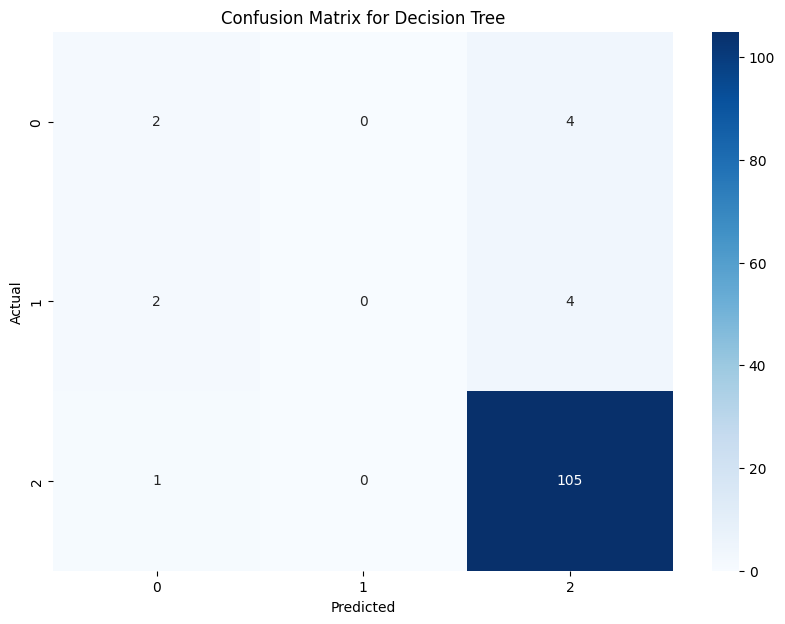

In [24]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()